In [35]:
import pydotplus
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from IPython.display import Image
from sklearn import tree
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
credit_data = pd.read_csv('german_credit.csv')
credit_data

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [28]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(credit_data.iloc[:, 1:], credit_data.iloc[:, 0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [29]:
dot_data = tree.export_graphviz(model, out_file="tree.out",
                         feature_names=list(credit_data)[1:], 
                         class_names=list(['no', 'yes']),
                         filled=True, rounded=True,  
                         special_characters=True)

Fontconfig error: "local.conf", line 1: no element found



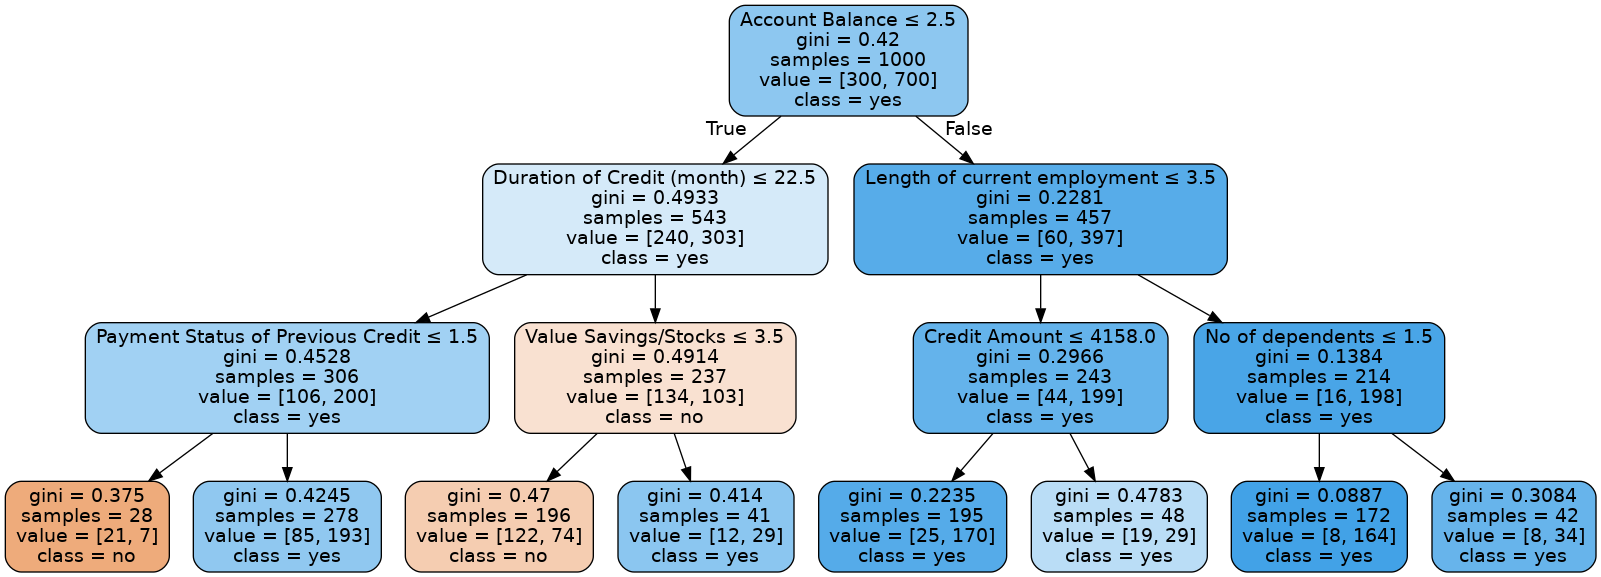

In [30]:
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())

Первое разбиение происходит по балансу клиента. Очевидно, что если баланс у человека маленький, то он не вернет кредит с большей вероятностью. Как раз именно по этой ветке мы и видим большое количество не выданных кредитов. Так же мы видим, что в чаще кредиты выдавались, но это связано с тем, что в нашей выборке из 1000 элементов 700 положительных ответов, что гораздо больше отрицательных.

In [41]:
max_depth = 40
y_true = credit_data.iloc[:, 0]
model = [tree.DecisionTreeClassifier(max_depth=k) for k in range(max_depth)]
training_data = np.zeros(max_depth)
cross_val = np.zeros(max_depth)
for k in range(1, max_depth):
    model[k].fit(credit_data.iloc[:, 1:], y_true)
    training_data[k] = accuracy_score(y_true, model[k].predict(credit_data.iloc[:, 1:]))
    cross_val[k] = cross_val_score(model[k], credit_data.iloc[:, 1:], y_true).mean()

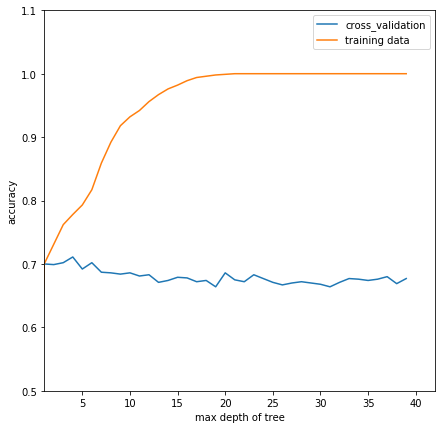

In [43]:
plt.figure(figsize = (7, 7))
plt.xlabel('max depth of tree')
plt.ylabel('accuracy')

plt.plot(range(max_depth), cross_val, label = 'cross_validation')
plt.plot(range(max_depth), training_data, label = 'training data')
plt.xlim(1, max_depth+2)
plt.ylim(0.5, 1.1)
plt.legend()
plt.show()

Из графика видно, что при отсутствии кросс валидации длинные деревья начинают переобучаться (плато на графике по тренировочной выборке как раз говорит, что дерево переобучилось).